In [1]:
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
from sklearn import metrics 


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

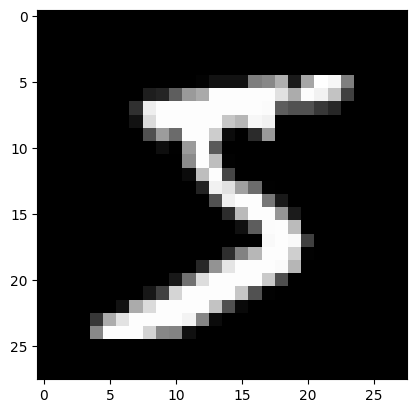

In [4]:
plt.imshow(x_train[0], cmap='gray') 

In [5]:
plt.show() 

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print("X_train shape", x_train.shape) 
print("y_train shape", y_train.shape) 
print("X_test shape", x_test.shape) 
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
x_train = x_train.astype('float32') 

In [10]:
x_test = x_test.astype('float32')

In [11]:
x_train /= 255 
x_test /= 255

In [12]:
num_classes = 10

In [13]:
y_train = np.eye(num_classes)[y_train] 
y_test = np.eye(num_classes)[y_test] 

In [14]:
model = Sequential()

In [15]:
model.add(Dense(512, activation='relu', input_shape=(784,))) 

In [16]:
model.add(Dropout(0.2)) 

In [17]:
model.add(Dense(512, activation='relu')) 


In [18]:
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax')) 

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [20]:
batch_size = 128 

In [21]:
epochs = 20

In [22]:
history = model.fit(x_train, y_train,
batch_size=batch_size, epochs=epochs,
verbose=1, 
validation_data=(x_test, y_test)) 

Epoch 1/20
469/469 [==============================] - 13s 23ms/step - loss: 0.2521 - accuracy: 0.9226 - val_loss: 0.1205 - val_accuracy: 0.9602
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1062 - accuracy: 0.9676 - val_loss: 0.0814 - val_accuracy: 0.9733
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0753 - accuracy: 0.9760 - val_loss: 0.0683 - val_accuracy: 0.9799
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0610 - accuracy: 0.9810 - val_loss: 0.0705 - val_accuracy: 0.9799
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0753 - val_accuracy: 0.9784
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0618 - val_accuracy: 0.9821
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0636 - val_accuracy: 0.983

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.08018597215414047
Test accuracy: 0.9846000075340271
